# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [2]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=3, n_jobs=2, random_state=0)

random_forest.fit(data_train, target_train)
random_forest.score(data_test, target_test)

0.6583971991680415

The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [3]:
new_penguins = penguins[(penguins["Flipper Length (mm)"] > 170) & (penguins["Flipper Length (mm)"] < 230)]
new_data, new_target = new_penguins[[feature_name]], new_penguins[target_name]

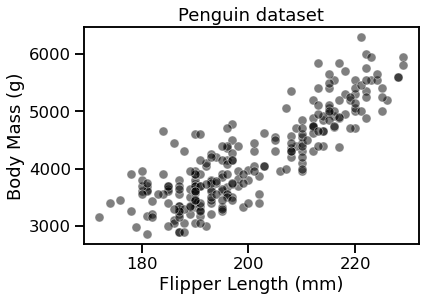

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

new_data_train, new_data_test, new_target_train, new_target_test = train_test_split(
    new_data, new_target, random_state=0)

sns.scatterplot(x=new_data_train[feature_name], y=new_target_train, color="black",
                alpha=0.5)
_ = plt.title("Penguin dataset")

In [10]:
min(new_data_train[feature_name])

172.0

In [12]:
import numpy as np

to_plot = np.arange(min(new_data_train[feature_name]) - 10,
                    max(new_data_train[feature_name]) + 10,
                    1)

In [5]:
random_forest.fit(new_data_train, new_target_train)
random_forest.score(new_data_test, new_target_test)

0.6143823479814068

In [6]:
random_forest.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_features='auto', random_state=924231285)]

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


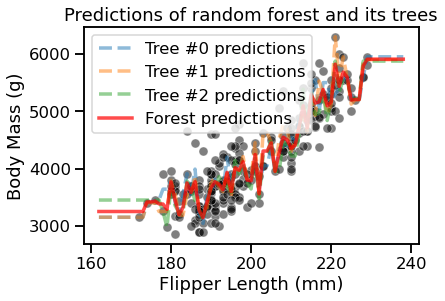

In [19]:
random_trees = random_forest.estimators_

sns.scatterplot(x=new_data_train[feature_name], y=new_target_train, color="black",
                alpha=0.5)

for tree_idx, tree in enumerate(random_trees):
    to_predict = to_plot.reshape(-1, 1)
    tree_predictions = tree.predict(to_predict)
    plt.plot(to_predict, tree_predictions, linestyle="--", alpha=0.5,
             label=f"Tree #{tree_idx} predictions")
    
forest_predictions = random_forest.predict(to_predict)
plt.plot(to_predict, forest_predictions, linestyle="-", alpha=0.7,
             label=f"Forest predictions", color="red")

plt.legend()
_ = plt.title("Predictions of random forest and its trees")

